### 1. import necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

### 2. read the data

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3 a. get the shape of the data

In [3]:
data.shape

(1338, 7)

### 3 b. data type of each attribute

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3 c. missing values ~ True?

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3 d. 5 point summary

minimum,
25% quantile,
median, 
75% quantile, 
maximum 

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3 e. Distribution of 'bmi' , 'age' and 'charges'

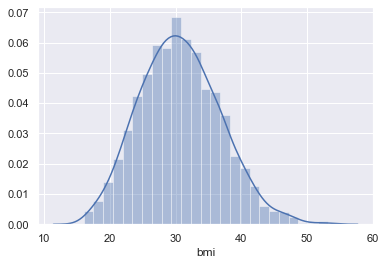

In [7]:
sns.distplot(data['bmi']);

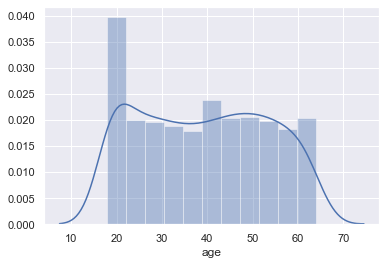

In [8]:
sns.distplot(data['age']);

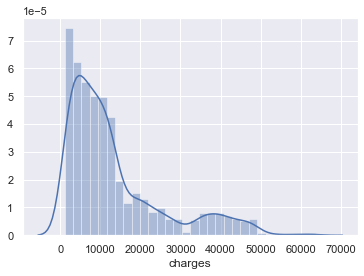

In [9]:
sns.distplot(data['charges']);

### 3 f. Skewness for 'Age','BMI' and 'Charges'

In [10]:
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

### 3 g. Checking for presence of 'outliers'

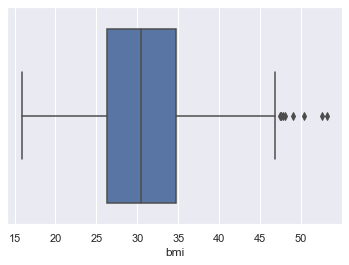

In [11]:
sns.boxplot(data['bmi']);

#from the graph below it can be inferred that there is substanital presence of outliers in the distribution of this
#feature's data

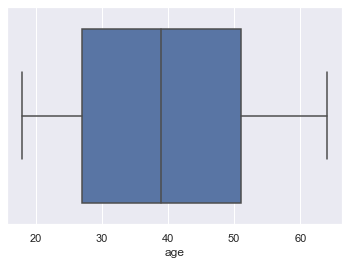

In [12]:
sns.boxplot(data['age']);

#from the graph below it can be inferred that there is no presence of outliers in the distribution of this
#feature's data


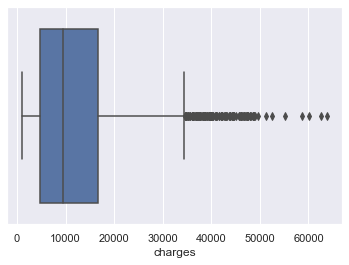

In [13]:
sns.boxplot(data['charges']);

#from the graph below it can be inferred that there is an dense presence of outliers in the distribution of this
#feature's data

### 3 h. Distribution of categorical columns

In [133]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


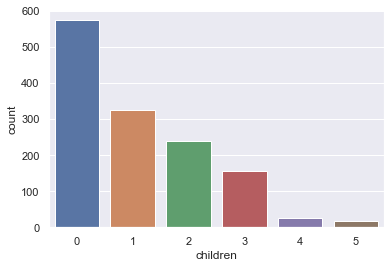

In [137]:
sns.countplot(data['children']);

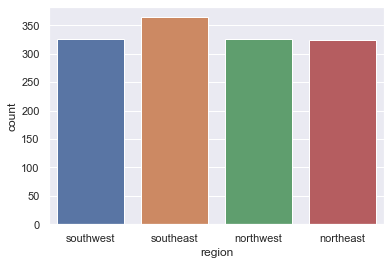

In [136]:
sns.countplot(data['region']);

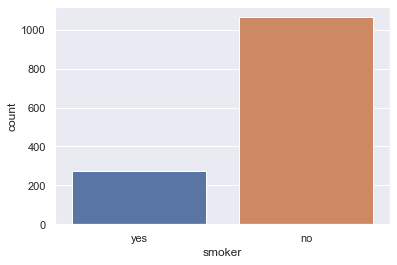

In [138]:
sns.countplot(data['smoker']);

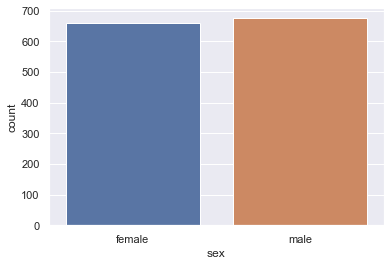

In [139]:
sns.countplot(data['sex']);

### 3 i. Pairplot of all columns

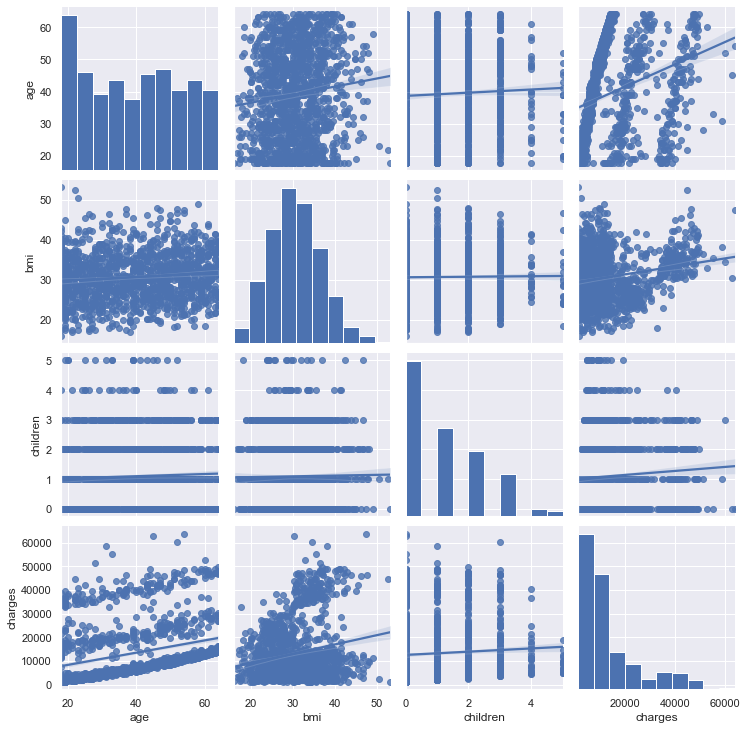

In [15]:
sns.pairplot(data,kind='reg')
plt.show()

### 4 a. Checking if charges for smoker differs significantly from the charges for non-smokers


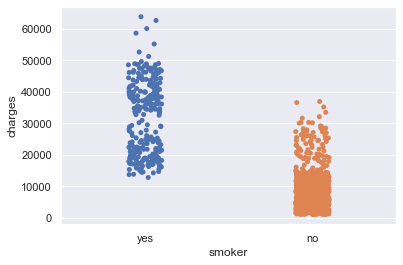

In [16]:
sns.stripplot(data['smoker'],data['charges'],jitter=True);

the above graph plainly reflects the dramatic difference in various aspects between the data
in the two categories

In [ ]:
sns.distplot(data['bmi'])

In [37]:
chg4smoker = data['charges'][data['smoker']=='yes']

In [38]:
print(chg4smoker)

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64


In [39]:
chg4nonsmokr = data['charges'][data['smoker']=='no']
print(chg4nonsmokr)

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


In [62]:
from scipy.stats import ttest_1samp, ttest_ind
import math

In [69]:
t_statistic,p_value = ttest_ind(chg4smoker,chg4nonsmokr)
print(t_statistic,p_value)

46.664921172723716 8.271435842177219e-283


Hence it has also statistically been prove the highly conspicuous difference in charges for smokers 
and non smokers and the difference somehow seems to be huge in terms of 't-statistic'. Nonetheless,
let's manually validate the huge difference.

In [71]:
mu1 = chg4smoker.mean()
mu2 = chg4nonsmokr.mean()

print(mu1,mu2)
s1 = chg4smoker.describe()['std']
s2 = chg4nonsmokr.describe()['std']
n1 = len(chg4smoker)
n2 = len(chg4nonsmokr)
d1 = s1**2/n1
d2 = s2**2/n2
d = math.sqrt(d1 + d2)
n = mu1-mu2
n/d

32050.23183153285 8434.268297856199


32.75188776634185

Although, drastically different from the value calculated algorithmically, it is substantial enough
to reject the null hypothesis that there's no significant difference betw the charges for smokers and non-smokers
even with a 'confidence level' of 99%.

 ### 4 b. checking if bmi for males differs significantly from that of females

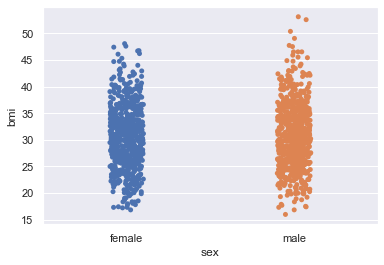

In [72]:
sns.stripplot(data['sex'],data['bmi'],jitter=True);

In the above graph the difference in bmi betw Males and Females seems to be little and worthy of quantizing. 

In [73]:
m_bmi = data['bmi'][data['sex']=='male']
print(m_bmi)

1       33.770
2       33.000
3       22.705
4       28.880
8       29.830
         ...  
1324    25.935
1325    33.535
1327    30.030
1329    38.600
1333    30.970
Name: bmi, Length: 676, dtype: float64


In [74]:
f_bmi = data['bmi'][data['sex']=='female']
print(f_bmi)

0       27.90
5       25.74
6       33.44
7       27.74
9       25.84
        ...  
1332    44.70
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 662, dtype: float64


In [76]:
t_statistic,p_value = ttest_ind(m_bmi,f_bmi)
print(t_statistic,p_value)

1.696752635752224 0.08997637178984932


At 90% confidence level, the t_statistic falls outside the threshold of 1.645, leading to rejection of H0

At 95% confidence level, the t_statistic falls within the threshold of 1.960, leading to acceptance of H0 

At 99.7% confidence level, the t_statistic falls within the threshold of 2.576, leading to acceptance of H0

where H0 would be that there's no significant difference betw the bmis of males and females.

### 4 c. Checking if proportions of smokers differ significantly betw genders.

In [31]:
f_smoke_yes = data['smoker'][data['sex']=='female'] == 'yes'
n_fsmokrs = len(f_smoke_yes)
n_female = len(data['sex']=='female')
print(n_fsmokrs,n_female)


662 1338


In [34]:
m_smoke_yes = data['smoker'][data['sex']=='male'] == 'yes'
n_msmokrs = len(m_smoke_yes)
n_male = len(data['sex']=='male')
print(n_msmokrs,n_male)

676 1338


In [36]:
print(f'proportions of smokers in males and females: {round(n_msmokrs/n_male,2)}% and {round(n_fsmokrs/n_female,2)}%')

proportions of smokers in males and females: 0.51% and 0.49%


In [39]:
from statsmodels.stats.proportion import proportions_ztest

In [44]:
stat, pval = proportions_ztest([n_fsmokrs,n_msmokrs],[n_female,n_male])

if pval < 0.05:
    print(f'with p_val of {round(pval,4)} being below the 5% alpha mark it fails to prove the null hypothesis')
else:
    print(f'with p_val of {round(pval,4)} being being greater than 0.05 it proves the null hypothesis')

with p_val of 0.5883 being being greater than 0.05 it proves the null hypothesis


and therefore there is no significant difference in the proportions of smokers in male and female.

### 4 d. If BMI distributions are not significantly different among women with two children to none.

In [61]:
female_bmi = data['bmi'][data['sex']=='female']

In [65]:
fbmi_0k = female_bmi[data['children']==0]   #where k - kids
print(fbmi_0k)

0       27.90
5       25.74
9       25.84
11      26.29
13      39.82
        ...  
1331    33.40
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 289, dtype: float64


In [66]:
fbmi_1k = female_bmi[data['children']==1]
print(fbmi_1k)

6       33.440
16      30.780
21      32.400
23      31.920
58      22.880
         ...  
1262    28.050
1263    29.900
1287    25.900
1299    25.745
1302    20.800
Name: bmi, Length: 158, dtype: float64


In [67]:
fbmi_2k = female_bmi[data['children']==2]
print(fbmi_2k)

27      32.775
41      36.630
43      30.800
46      38.665
51      33.630
         ...  
1313    34.700
1319    26.315
1323    40.370
1328    24.225
1330    25.740
Name: bmi, Length: 119, dtype: float64


In [92]:
f_0kids = data['children'][data['sex']=='female'] == 0
wom0kids = f_0kids[f_0kids==True]
len(wom0kids)

289

In [94]:
f_1kids = data['children'][data['sex']=='female'] == 1
wom1kids = f_1kids[f_1kids == True]
len(wom1kids)

158

In [96]:
f_2kids = data['children'][data['sex']=='female'] == 2
wom2kids = f_2kids[f_2kids == True]
len(wom2kids)

119

In [98]:
min(len(wom0kids),
len(wom1kids),
len(wom2kids))

119

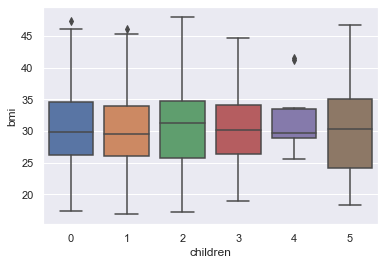

In [100]:
sns.boxplot(data['children'][data['sex']=='female'], data['bmi'])

In [120]:
mothers_df = pd.DataFrame()

df1 = pd.DataFrame({'children':'0','mother_bmi': fbmi_0k})
df2 = pd.DataFrame({'children':'1','mother_bmi': fbmi_1k})
df3 = pd.DataFrame({'children':'2','mother_bmi': fbmi_2k})

mothers_df = mothers_df.append(df1)
mothers_df = mothers_df.append(df2)
mothers_df = mothers_df.append(df3)

In [121]:
mothers_df

,children,mother_bmi
0,0,27.900
5,0,25.740
9,0,25.840
11,0,26.290
13,0,39.820
...,...,...
1313,2,34.700
1319,2,26.315
1323,2,40.370
1328,2,24.225


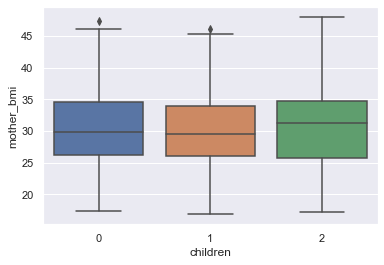

In [122]:
sns.boxplot(x = 'children', y  = 'mother_bmi', data = mothers_df)

### In the above plot there's no seeming difference in the means of BMIs of the mothers with 0 to 2 children except for slight variation in the median. 

In [118]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

In [124]:
mod = ols('mother_bmi ~ children', data = mothers_df).fit()
aov_table = sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


In [132]:
p_val = aov_table['PR(>F)'][0]

if p_val < 0.10:
    print(f'the p value {round(p_val,4)} behind the significant level of 10% and this disproves the null hypothesis')
else:
    print(f'the p value {round(p_val,4)} exceeds the significance level of 10% which confirms the null hypothesis')

the p value 0.7159 exceeds the significance level of 10% which confirms the null hypothesis


###### Even at 10% significance level, the probability value outweighs the alpha value [0.10] corroborating the null hypothesis where the 'null hypothesis' is that there's no significant difference in the bmi's of the women with 2 children to none. 